<a href="https://colab.research.google.com/github/risker93/Hello_World/blob/main/2021_06_10_%EC%BA%90%EA%B8%80%EC%A0%84_%EC%88%98%EC%97%85_%EB%89%B4%EC%9A%95%EC%8B%9C%ED%8B%B0%EC%97%90%EC%96%B4%EB%B9%84%EC%97%94%EB%B9%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd

In [32]:
data = pd.read_csv('AB_NYC_2019.csv')

In [33]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [34]:
df = pd.DataFrame(data)

In [35]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [36]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [38]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [39]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [77]:
df['room_type']

0           Private room
1        Entire home/apt
2           Private room
3        Entire home/apt
4        Entire home/apt
              ...       
48890       Private room
48891       Private room
48892    Entire home/apt
48893        Shared room
48894       Private room
Name: room_type, Length: 48895, dtype: object

In [40]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

룸타입은 세종류 이구나.

In [41]:
#널값을 한번 보도록 하자.
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

라스트리뷰와, 리뷰퍼먼스 값이 같다, 둘이 정말 같은가 보도록 하자

In [42]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [43]:
df['reviews_per_month'].isna()

0        False
1        False
2         True
3        False
4        False
         ...  
48890     True
48891     True
48892     True
48893     True
48894     True
Name: reviews_per_month, Length: 48895, dtype: bool

In [44]:
df['last_review'].isna()

0        False
1        False
2         True
3        False
4        False
         ...  
48890     True
48891     True
48892     True
48893     True
48894     True
Name: last_review, Length: 48895, dtype: bool

둘의 트루값이 같은 위치에 있는지 확인해보자

In [45]:
(df['reviews_per_month'].isna()&df['last_review'].isna()).sum() #불을 썸하면 투루는 1 펄스는 0

10052

아하 이 둘이 같은 부분에 결측치를 가지는 구나

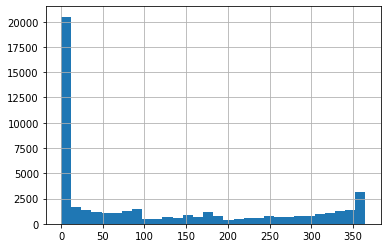

In [46]:
#숙박이 가능한 일수를 한번 보도록 하자.
df['availability_365'].hist(bins=30)
#0에 좀 많은거 같다 bins= 를 넣어서 다시 확인해보자.
#넣어보니 0에 확실히 많다.

In [47]:
#0인 경우가 트루니 sum을 해주면 0의 갯수가 나올것이다.
(df['availability_365'] == 0).sum()

#4만8천개중에서 1만7천개의 0이 있네요?


17533

이제 필요 없는 것들을 제거 해보자.

In [48]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [50]:
#df.drop(,axis=1) 이런식으로 무조건 엑시스 1을 적고 시작해라
#df.drop([],axis=1, inplace=True) 기본적 세팅.
df.drop(['id','latitude','longitude'],axis=1, inplace=True)
#실제로는 raw 데이터를 수정하지 말고 카피해서 사용하자.
#raw_df = df.copy()


In [ ]:
df.head()

In [51]:
df.drop(['name'],axis=1, inplace=True)

In [52]:
df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


X값과 Y값의 상관성을 보자.

전처리를 안했지만 그래도 해보는게 좋다.

전처리보다 중요한게 도메인 지식이다. 

    모르는것은 모두 구글링으로 해결하자.
    기술발전이 너무 빨라서, 명령어 같은것들을 머리에 집어 넣는것들은 비효율적이고,
    중요한 개념들만 공부를 하고, 블로그 보다는
    공식문서가 더 좋다.

In [53]:
df.columns

Index(['host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

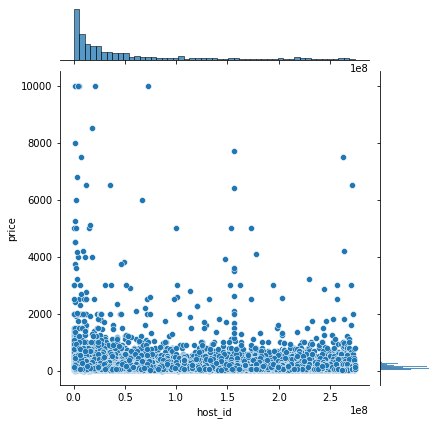

In [56]:
import seaborn as sns
sns.jointplot(x='host_id', y='price', data=df)

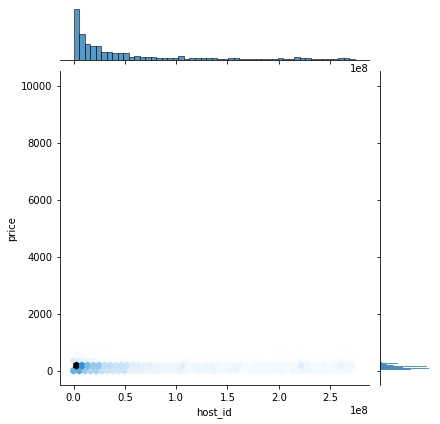

In [60]:
sns.jointplot(x='host_id', y='price', data=df, kind='hex') #중복되는걸 강조하는 kind='hex

지금 우리는 수치형 끼리 확인해 보고 있다 

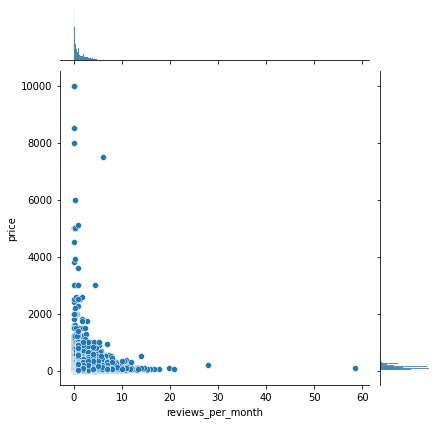

In [59]:
sns.jointplot(x='reviews_per_month', y='price', data=df)

이상치는 잘라야 겠구나.

In [61]:
df.columns

Index(['host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

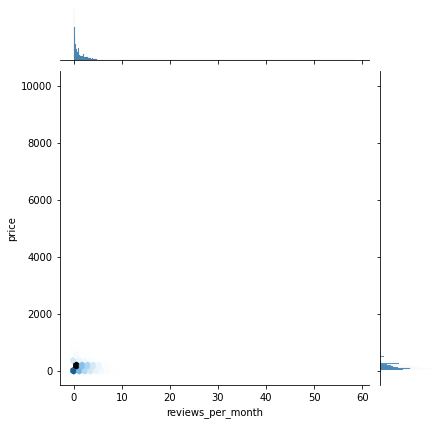

In [62]:
sns.jointplot(x='reviews_per_month', y='price', data=df,kind='hex')

이상하구나 짜르긴 짤라야 겠구나

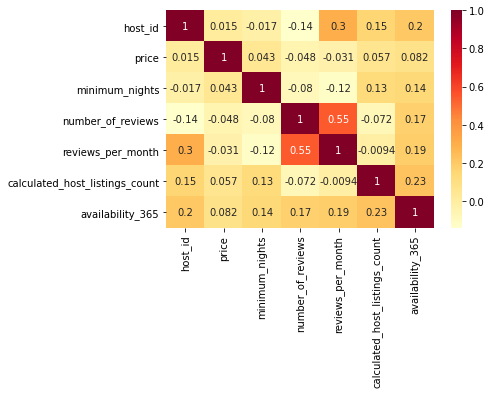

In [63]:
sns.heatmap(df.corr(), annot=True, cmap='YlOrRd')

반드시 최대한 다양한 방법으로 시도하는것이 좋다.

큰틀은 수치형 데이터와 범주형 데이터로 나누고 다시 합쳐서

모델링을 한다.

범주형 데이터도 한번 간단하게 확인을 해보자

In [64]:
df.columns

Index(['host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

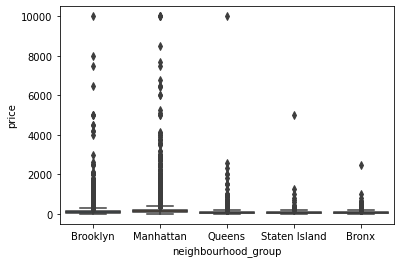

In [65]:
sns.boxplot(x='neighbourhood_group', y='price', data=df)

가격이 계속 이상하게 나온다.

지금은 분류가 아니라 회귀이기 때문에

y축에 수치형을 두었다.

우리가 하는 문제에 따라 y축에 수치형 데이터를 넣는지, 범주형을 넣는지.

In [66]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [67]:
len(df['neighbourhood'].value_counts())

221

In [68]:
df['neighbourhood'].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Woodrow                  1
Fort Wadsworth           1
Richmondtown             1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

1이 많이 나오네? 뭐지?

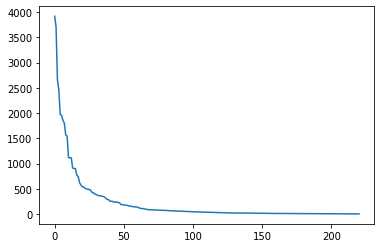

In [74]:
import matplotlib.pyplot as plt

neigh = df['neighbourhood'].value_counts()
plt.plot(range(221), neigh)

기준은 임의 

50까지는 그냥 쓰고 뒤에는 하나로 합쳐서 새로 만들어주자.

In [75]:
df['neighbourhood'] = df['neighbourhood'].apply(lambda s: s if str(s) not in neigh[50:] else 'others')

코드를 대충 구현하고, 

그 이후에 수정을 해주는 것이다.

알고리즘을 배우는 이유도또한 

코드를 돌려보고 빠르게 재구성 하기 위함.

코딩테스트는 그 산업에 맞는 문제가 나오게 된다.

In [79]:
neigh[50:]

Tribeca            177
Boerum Hill        177
Kensington         175
Sheepshead Bay     164
Windsor Terrace    157
                  ... 
Woodrow              1
Fort Wadsworth       1
Richmondtown         1
Rossville            1
Willowbrook          1
Name: neighbourhood, Length: 171, dtype: int64

50 안에도 1이 있지만 그냥 쓰자.

    lambda s: s if str(s) not in neigh[50:] else 'others'
    
    이 코드는 
    if str(s) not in neigh[50:]:
      s=s
    else:
      'others'


In [76]:
df['neighbourhood']

0                    others
1                   Midtown
2                    Harlem
3              Clinton Hill
4               East Harlem
                ...        
48890    Bedford-Stuyvesant
48891              Bushwick
48892                Harlem
48893        Hell's Kitchen
48894        Hell's Kitchen
Name: neighbourhood, Length: 48895, dtype: object

In [78]:
df['neighbourhood'].value_counts()

others                       6248
Williamsburg                 3920
Bedford-Stuyvesant           3714
Harlem                       2658
Bushwick                     2465
Upper West Side              1971
Hell's Kitchen               1958
East Village                 1853
Upper East Side              1798
Crown Heights                1564
Midtown                      1545
East Harlem                  1117
Greenpoint                   1115
Chelsea                      1113
Lower East Side               911
Astoria                       900
Washington Heights            899
West Village                  768
Financial District            744
Flatbush                      621
Clinton Hill                  572
Long Island City              537
Prospect-Lefferts Gardens     535
Park Slope                    506
East Flatbush                 500
Fort Greene                   489
Murray Hill                   485
Kips Bay                      470
Flushing                      426
Ridgewood     

50 이후에 1값들은 다 'others'로 바꿨다.

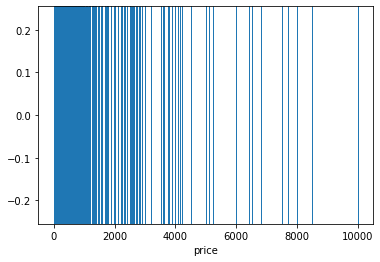

In [82]:
sns.rugplot(x='price', data=df,height=1)

눈으로 확인해서 자르기에는 조금 애매하다.

퍼센티지로 확인해보자

In [83]:
df['price'].quantile(0.99)

799.0

이 말은 상위 99프로에 있는 price를 찍어줘.

800이면 그림상에서 왼쪽인데.

99프로의 값이 몰려있다.

이 몰려있는 값들은 1프로 정도이다.

얘를 지우고 하는게 더 나을수 있을거라고 생각을 한다.

In [86]:
print(df['price'].quantile(0.95))
print(df['price'].quantile(0.005))

355.0
26.0


프라이스도 잘라내고, 다른값들도 확인을 하고 잘라낼수있다.

In [87]:
h_price = df['price'].quantile(0.95)
l_price = df['price'].quantile(0.005)

In [88]:
df['price'] < h_price

0        True
1        True
2        True
3        True
4        True
         ... 
48890    True
48891    True
48892    True
48893    True
48894    True
Name: price, Length: 48895, dtype: bool

In [89]:
df['price']> l_price

0        True
1        True
2        True
3        True
4        True
         ... 
48890    True
48891    True
48892    True
48893    True
48894    True
Name: price, Length: 48895, dtype: bool

In [98]:
df= df[(df['price'] < h_price) & (df['price'] > l_price )]

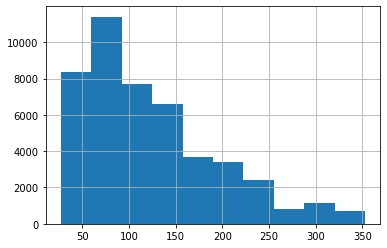

In [99]:
df['price'].hist()

In [100]:
df.columns

Index(['host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [101]:
df['review_exists']=df['reviews_per_month'].isna().apply(lambda x: 'No' if x == True else 'Yes')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


isna 는 널값일 경우 투르이고, 여기에 어플라이를 적용.

x가 트루라면 'No' 로 바꿔주고, 아니라면 'Yes'로 바꿔주세요.

In [102]:
df.drop(['host_name', 'last_review', 'reviews_per_month'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [103]:
df.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365', 'review_exists'],
      dtype='object')

In [104]:
X_cat = df[['neighbourhood_group','neighbourhood', 'room_type','review_exists' ]]#cat는 category

In [105]:
X_cat.head()

,neighbourhood_group,neighbourhood,room_type,review_exists
0,Brooklyn,others,Private room,Yes
1,Manhattan,Midtown,Entire home/apt,Yes
2,Manhattan,Harlem,Private room,No
3,Brooklyn,Clinton Hill,Entire home/apt,Yes
4,Manhattan,East Harlem,Entire home/apt,Yes


이 값 자체를 원핫인코딩.

In [108]:
X_cat = pd.get_dummies(X_cat) #범주형 데이터
X_cat.head()

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Astoria,neighbourhood_Bedford-Stuyvesant,neighbourhood_Bushwick,neighbourhood_Carroll Gardens,neighbourhood_Chelsea,neighbourhood_Chinatown,neighbourhood_Clinton Hill,neighbourhood_Crown Heights,neighbourhood_Ditmars Steinway,neighbourhood_East Elmhurst,neighbourhood_East Flatbush,neighbourhood_East Harlem,neighbourhood_East New York,neighbourhood_East Village,neighbourhood_Elmhurst,neighbourhood_Financial District,neighbourhood_Flatbush,neighbourhood_Flushing,neighbourhood_Fort Greene,neighbourhood_Gowanus,neighbourhood_Gramercy,neighbourhood_Greenpoint,neighbourhood_Greenwich Village,neighbourhood_Harlem,neighbourhood_Hell's Kitchen,neighbourhood_Inwood,neighbourhood_Jackson Heights,neighbourhood_Jamaica,neighbourhood_Kips Bay,neighbourhood_Long Island City,neighbourhood_Lower East Side,neighbourhood_Midtown,neighbourhood_Morningside Heights,neighbourhood_Murray Hill,neighbourhood_Nolita,neighbourhood_Park Slope,neighbourhood_Prospect Heights,neighbourhood_Prospect-Lefferts Gardens,neighbourhood_Ridgewood,neighbourhood_SoHo,neighbourhood_South Slope,neighbourhood_Sunnyside,neighbourhood_Sunset Park,neighbourhood_Theater District,neighbourhood_Upper East Side,neighbourhood_Upper West Side,neighbourhood_Washington Heights,neighbourhood_West Village,neighbourhood_Williamsburg,neighbourhood_Woodside,neighbourhood_others,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,review_exists_No,review_exists_Yes
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


    #원핫 인코딩 전의 컬럼 값들이 원핫 인코딩 되어서 컬럼수가 늘어남
    확인을 위해 헤드값을 뽑아 보았지만 출력을 실제로 해보진 않음.


In [118]:
X_num = df.drop(['neighbourhood_group', 'neighbourhood', 'room_type', 'review_exists'], axis=1)



#위에서 범주형으로 넣은 값들 을 드랍해버리면, 수치형 데이터들이 나오게 된다.

In [120]:
X_num = X_num.drop(['availability_365'], axis=1)


In [121]:
X_num.head()

,host_id,price,minimum_nights,number_of_reviews,calculated_host_listings_count
0,2787,149,1,9,6
1,2845,225,1,45,2
2,4632,150,3,0,1
3,4869,89,1,270,1
4,7192,80,10,9,1


In [125]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns =X_num.columns)

In [122]:
X_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46191 entries, 0 to 48894
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   host_id                         46191 non-null  int64
 1   price                           46191 non-null  int64
 2   minimum_nights                  46191 non-null  int64
 3   number_of_reviews               46191 non-null  int64
 4   calculated_host_listings_count  46191 non-null  int64
dtypes: int64(5)
memory usage: 2.1 MB


In [126]:
X = pd.concat([X_scaled, X_cat], axis=1)
y = df['price']

In [127]:
len(y)

46191

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [129]:
from xgboost import XGBRegressor
model_reg = XGBRegressor()
model_reg.fit(X_train, y_train)


[08:33:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [130]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
pred = model_reg.predict(X_test)
print(mean_absolute_error(y_test, pred))
print(sqrt(mean_squared_error(y_test, pred)))


0.14360751340461167
0.31811625900509316


price 값을 작게 바꿧다.
이 작게 바꾼 값을 되돌릴 수도 있다.

궁굼하면 검색

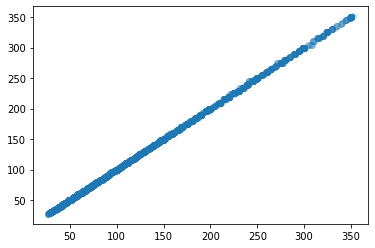

In [131]:
#너무 과적합 되었네.
plt.scatter(x=y_test, y=pred, alpha=0.1)
plt.plot([0, 350], [0,350])

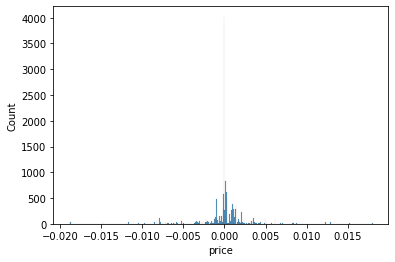

In [132]:
err = (pred-y_test) / y_test
sns.histplot(err)

결과가 나온것을 보니 무엇인가 잘못 했구나.

왼쪽으로 치우쳤다는것은 계산을 할때 0보다 작은값들이 0보다 큰값들보다 많다는 것을 의미하고.

음수가 나온다는 것은, 예측값 보다. y-test값이 큰 경우가 더 많다는 의미이다.

이를 그래프로 그려보면 

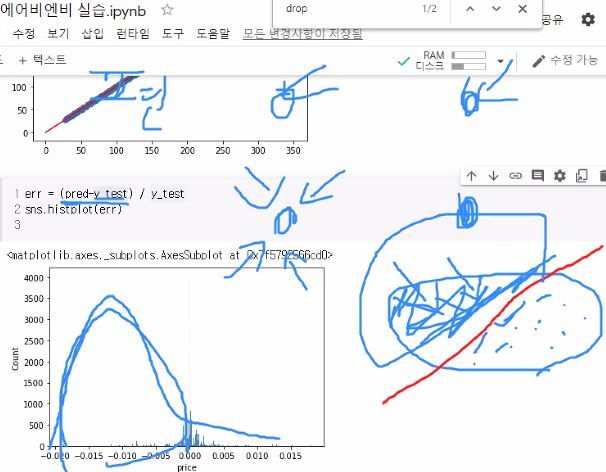


빨간선 위쪽 값이 더 많다는 의미 이고,

이 값들을 줄여주는 방향으로 문제를 해결할수 있다.